In [1]:
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt
import numpy as np

data_path = "../datasets/"

In [2]:
ri_file = data_path + "police.csv"
# rhode islang police data
ri = pd.read_csv(ri_file)
ri.head()

state   stop_date stop_time  county_name driver_gender driver_race  \
0    RI  2005-01-04     12:55          NaN             M       White   
1    RI  2005-01-23     23:15          NaN             M       White   
2    RI  2005-02-17     04:15          NaN             M       White   
3    RI  2005-02-20     17:15          NaN             M       White   
4    RI  2005-02-24     01:20          NaN             F       White   

                    violation_raw  violation  search_conducted search_type  \
0  Equipment/Inspection Violation  Equipment             False         NaN   
1                        Speeding   Speeding             False         NaN   
2                        Speeding   Speeding             False         NaN   
3                Call for Service      Other             False         NaN   
4                        Speeding   Speeding             False         NaN   

    stop_outcome is_arrested stop_duration  drugs_related_stop district  
0       Citation       False      0-15 Min               False  Zone X4  
1       Citation       False      0-15 Min               False  Zone K3  
2       Citation       False      0-15 Min               False  Zone X4  
3  Arrest Driver        True     16-30 Min               False  Zone X1  
4       Citation       False      0-15 Min               False  Zone X3

## Missing Values

In [3]:
# Missing values
ri.isnull().sum()

state                     0
stop_date                 0
stop_time                 0
county_name           91741
driver_gender          5205
driver_race            5202
violation_raw          5202
violation              5202
search_conducted          0
search_type           88434
stop_outcome           5202
is_arrested            5202
stop_duration          5202
drugs_related_stop        0
district                  0
dtype: int64

In [4]:
ri.shape

(91741, 15)

In [5]:
# seems county_name have all missing values, dropping it
ri.drop('county_name', axis='columns', inplace=True)

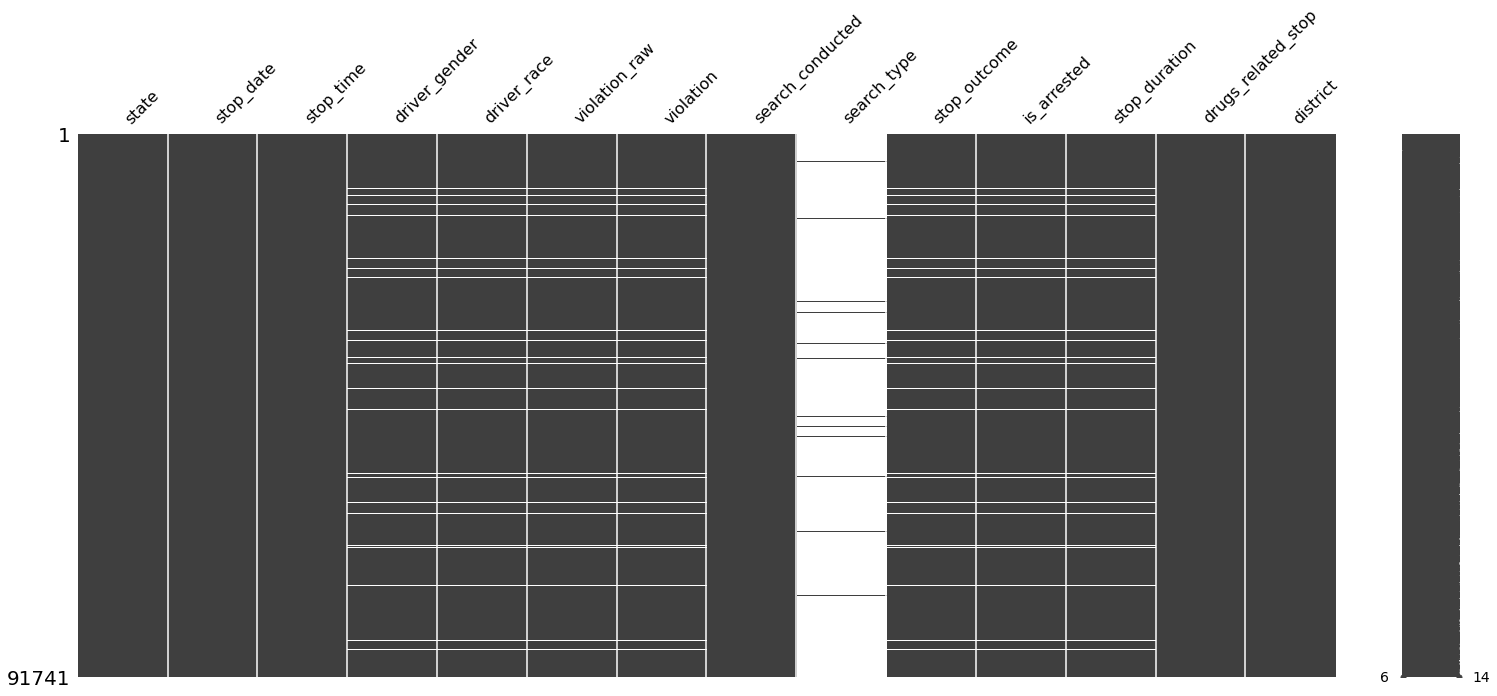

In [6]:
msno.matrix(ri)

it seems `driver_gender, driver_race, violation_raw, violation, stop_outcome, is_arrested, stop_duration` have similar rows with missing values

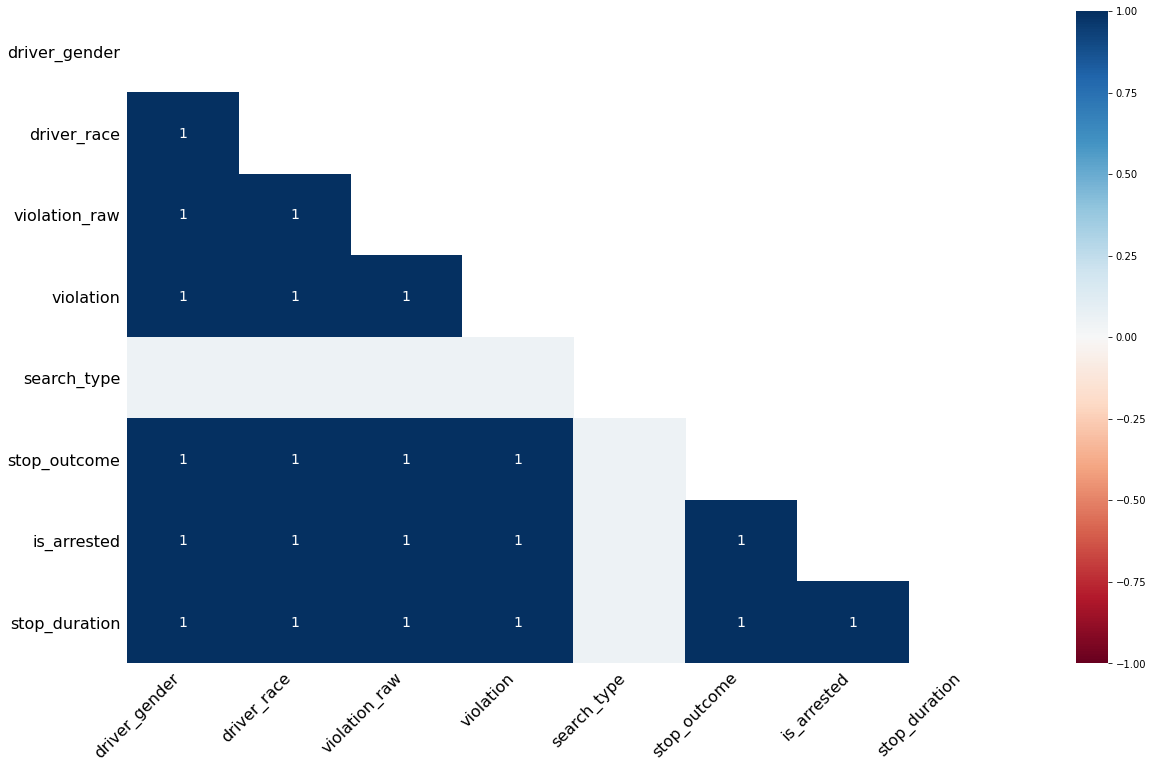

In [7]:
msno.heatmap(ri)

* A value near -1 means if one variable appears then the other variable is very likely to be missing.

* A value near 0 means there is no dependence between the occurrence of missing values of two variables.

* A value near 1 means if one variable appears then the other variable is very likely to be present.

In [8]:
# dropping one of them
ri.dropna(subset=['driver_gender'], inplace=True)
ri.isnull().sum()

state                     0
stop_date                 0
stop_time                 0
driver_gender             0
driver_race               0
violation_raw             0
violation                 0
search_conducted          0
search_type           83229
stop_outcome              0
is_arrested               0
stop_duration             0
drugs_related_stop        0
district                  0
dtype: int64

In [9]:
ri.shape

(86536, 14)

## Checking dtypes of columns

In [10]:
ri.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 86536 entries, 0 to 91740
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   state               86536 non-null  object
 1   stop_date           86536 non-null  object
 2   stop_time           86536 non-null  object
 3   driver_gender       86536 non-null  object
 4   driver_race         86536 non-null  object
 5   violation_raw       86536 non-null  object
 6   violation           86536 non-null  object
 7   search_conducted    86536 non-null  bool  
 8   search_type         3307 non-null   object
 9   stop_outcome        86536 non-null  object
 10  is_arrested         86536 non-null  object
 11  stop_duration       86536 non-null  object
 12  drugs_related_stop  86536 non-null  bool  
 13  district            86536 non-null  object
dtypes: bool(2), object(12)
memory usage: 8.7+ MB


### Counting unique values to guess their dtypes

In [11]:
def count_unique(df):
    for col in df.columns:
        print(f"[-] {col:<18}: {df[col].nunique()}")

count_unique(ri)

[-] state             : 1
[-] stop_date         : 3754
[-] stop_time         : 1424
[-] driver_gender     : 2
[-] driver_race       : 5
[-] violation_raw     : 12
[-] violation         : 6
[-] search_conducted  : 2
[-] search_type       : 25
[-] stop_outcome      : 6
[-] is_arrested       : 2
[-] stop_duration     : 3
[-] drugs_related_stop: 2
[-] district          : 6


In [12]:
# changing dtypes
bools_col = ['search_conducted', 'is_arrested', 'drugs_related_stop']
cat_cols = ['driver_gender', 'driver_race', 'violation_raw', 'violation', 'district', 'stop_outcome', 'search_type', 'stop_duration']

In [13]:
# function to convert dtype
def change_dtype(df, cols_to_convert, col_dtype):
    for col in cols_to_convert:
        df[col] = df[col].astype(col_dtype)

In [14]:
# to category
change_dtype(ri, cat_cols, 'category')
ri.select_dtypes(include='category').columns

Index(['driver_gender', 'driver_race', 'violation_raw', 'violation',
       'search_type', 'stop_outcome', 'stop_duration', 'district'],
      dtype='object')

In [15]:
# to bool
change_dtype(ri, bools_col, 'bool')
ri.select_dtypes(include='bool').columns

Index(['search_conducted', 'is_arrested', 'drugs_related_stop'], dtype='object')

In [16]:
ri.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 86536 entries, 0 to 91740
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   state               86536 non-null  object  
 1   stop_date           86536 non-null  object  
 2   stop_time           86536 non-null  object  
 3   driver_gender       86536 non-null  category
 4   driver_race         86536 non-null  category
 5   violation_raw       86536 non-null  category
 6   violation           86536 non-null  category
 7   search_conducted    86536 non-null  bool    
 8   search_type         3307 non-null   category
 9   stop_outcome        86536 non-null  category
 10  is_arrested         86536 non-null  bool    
 11  stop_duration       86536 non-null  category
 12  drugs_related_stop  86536 non-null  bool    
 13  district            86536 non-null  category
dtypes: bool(3), category(8), object(3)
memory usage: 3.6+ MB


In [17]:
ri[['stop_date', 'stop_time']].head()

stop_date stop_time
0  2005-01-04     12:55
1  2005-01-23     23:15
2  2005-02-17     04:15
3  2005-02-20     17:15
4  2005-02-24     01:20

In [18]:
# stop_data and stop_time could be combined in one col to make it datetime object
stop_date_time = ri.stop_date.str.cat(ri.stop_time, sep=' ')
stop_date_time.head()

0    2005-01-04 12:55
1    2005-01-23 23:15
2    2005-02-17 04:15
3    2005-02-20 17:15
4    2005-02-24 01:20
Name: stop_date, dtype: object

In [19]:
ri['stop_date_time'] = pd.to_datetime(stop_date_time)
ri.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 86536 entries, 0 to 91740
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   state               86536 non-null  object        
 1   stop_date           86536 non-null  object        
 2   stop_time           86536 non-null  object        
 3   driver_gender       86536 non-null  category      
 4   driver_race         86536 non-null  category      
 5   violation_raw       86536 non-null  category      
 6   violation           86536 non-null  category      
 7   search_conducted    86536 non-null  bool          
 8   search_type         3307 non-null   category      
 9   stop_outcome        86536 non-null  category      
 10  is_arrested         86536 non-null  bool          
 11  stop_duration       86536 non-null  category      
 12  drugs_related_stop  86536 non-null  bool          
 13  district            86536 non-null  category  

In [20]:
cols = ['state','stop_date_time', 'stop_date', 'stop_time', 'driver_gender', 'driver_race',
        'violation_raw', 'violation', 'search_conducted', 'search_type', 'stop_outcome',
        'is_arrested', 'stop_duration', 'drugs_related_stop', 'district', ]
ri = ri.reindex(columns=cols)
ri.head(2)

state      stop_date_time   stop_date stop_time driver_gender driver_race  \
0    RI 2005-01-04 12:55:00  2005-01-04     12:55             M       White   
1    RI 2005-01-23 23:15:00  2005-01-23     23:15             M       White   

                    violation_raw  violation  search_conducted search_type  \
0  Equipment/Inspection Violation  Equipment             False         NaN   
1                        Speeding   Speeding             False         NaN   

  stop_outcome  is_arrested stop_duration  drugs_related_stop district  
0     Citation        False      0-15 Min               False  Zone X4  
1     Citation        False      0-15 Min               False  Zone K3

In [21]:
# setting the stop_date_time as index
ri.set_index('stop_date_time', inplace=True)


In [22]:
ri.drop(['state', 'stop_time'],axis='columns', inplace=True)
ri.head(2)

stop_date driver_gender driver_race  \
stop_date_time                                              
2005-01-04 12:55:00  2005-01-04             M       White   
2005-01-23 23:15:00  2005-01-23             M       White   

                                      violation_raw  violation  \
stop_date_time                                                   
2005-01-04 12:55:00  Equipment/Inspection Violation  Equipment   
2005-01-23 23:15:00                        Speeding   Speeding   

                     search_conducted search_type stop_outcome  is_arrested  \
stop_date_time                                                                
2005-01-04 12:55:00             False         NaN     Citation        False   
2005-01-23 23:15:00             False         NaN     Citation        False   

                    stop_duration  drugs_related_stop district  
stop_date_time                                                  
2005-01-04 12:55:00      0-15 Min               False  Zone X4  
2005-01-23 23:15:00      0-15 Min               False  Zone K3

## Answering specific questions..

### Do the genders commit different violations?

In [23]:
# stop_outcome value counts ...
ri.stop_outcome.value_counts()

Citation            77091
Warning              5136
Arrest Driver        2735
No Action             624
N/D                   607
Arrest Passenger      343
Name: stop_outcome, dtype: int64

In [24]:
ri.stop_outcome.value_counts(normalize=True)

Citation            0.890855
Warning             0.059351
Arrest Driver       0.031605
No Action           0.007211
N/D                 0.007014
Arrest Passenger    0.003964
Name: stop_outcome, dtype: float64

In [25]:
pd.crosstab(index=ri.stop_outcome, columns=ri.driver_gender)

driver_gender         F      M
stop_outcome                  
Arrest Driver       556   2179
Arrest Passenger    113    230
Citation          21251  55840
N/D                 168    439
No Action           201    423
Warning            1485   3651

In [26]:
# as proportions
pd.crosstab(index=ri.stop_outcome, columns=ri.driver_gender, normalize=True)

driver_gender            F         M
stop_outcome                        
Arrest Driver     0.006425  0.025180
Arrest Passenger  0.001306  0.002658
Citation          0.245574  0.645281
N/D               0.001941  0.005073
No Action         0.002323  0.004888
Warning           0.017160  0.042191

### what about races and violations

In [27]:
ri.driver_race.value_counts()

White       61870
Black       12285
Hispanic     9727
Asian        2389
Other         265
Name: driver_race, dtype: int64

#### looking at violations by races

In [28]:
white = ri[ri.driver_race == 'White']
white.shape

(61870, 12)

In [29]:
white.stop_outcome.value_counts(normalize=True)

Citation            0.902263
Warning             0.057508
Arrest Driver       0.024018
No Action           0.007031
N/D                 0.006433
Arrest Passenger    0.002748
Name: stop_outcome, dtype: float64

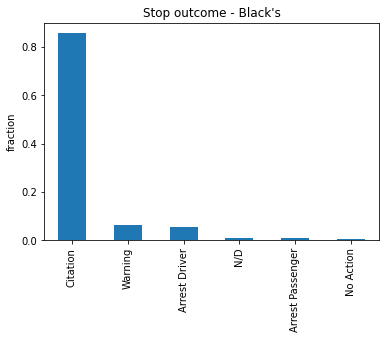

In [30]:
black = ri[ri.driver_race == 'Black']
black.stop_outcome.value_counts(normalize=True).plot(kind='bar')
plt.ylabel('fraction')
plt.title("Stop outcome - Black's")
plt.show()

In [31]:
asian = ri[ri.driver_race == 'Asian']

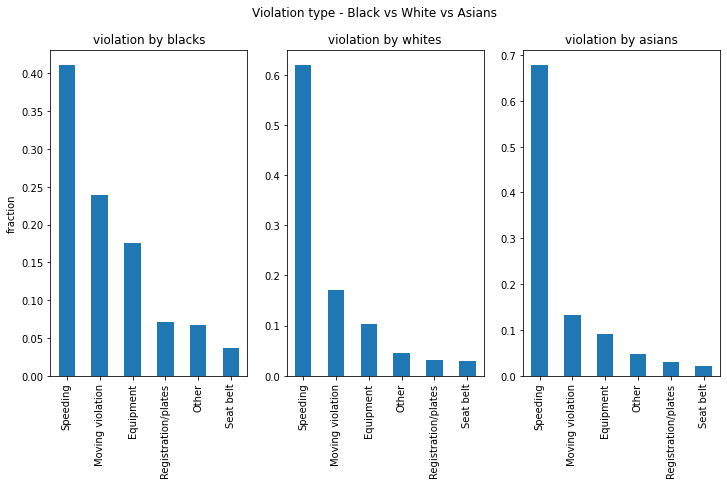

In [32]:
fig, (ax1,ax2, ax3) = plt.subplots(ncols=3, figsize=(12, 6))
black.violation.value_counts(normalize=True).plot(kind='bar', ax=ax1)
ax1.set(title='violation by blacks',
       ylabel='fraction')
white.violation.value_counts(normalize=True).plot(kind='bar', ax=ax2)
ax2.set_title('violation by whites')
asian.violation.value_counts(normalize=True).plot(kind='bar', ax=ax3)
ax3.set_title('violation by asians')
fig.suptitle("Violation type - Black vs White vs Asians")
plt.show()

#### Notes:
* Among the three asians are more likely to commit speeding violation.
* moving violation and equipment violation are the other 2 prominent violation type.

#### Gender wise violations

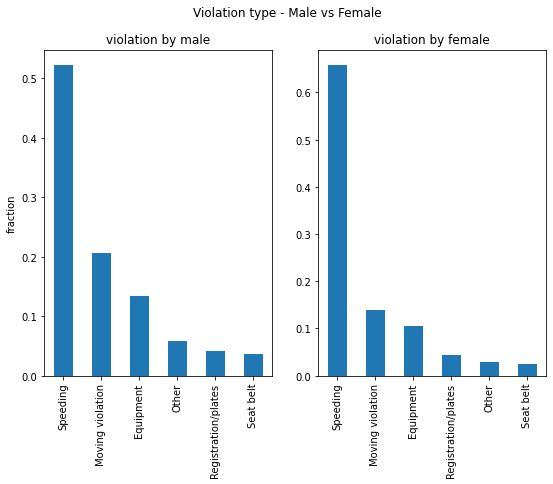

In [33]:
male = ri[ri.driver_gender=='M']
female = ri[ri.driver_gender=='F']

fig, (ax1,ax2) = plt.subplots(ncols=2, figsize=(9, 6))
male.violation.value_counts(normalize=True).plot(kind='bar', ax=ax1)
ax1.set(title='violation by male',
       ylabel='fraction')
female.violation.value_counts(normalize=True).plot(kind='bar', ax=ax2)
ax2.set_title('violation by female')
fig.suptitle("Violation type - Male vs Female")
plt.show()

#### Gender wise outcome

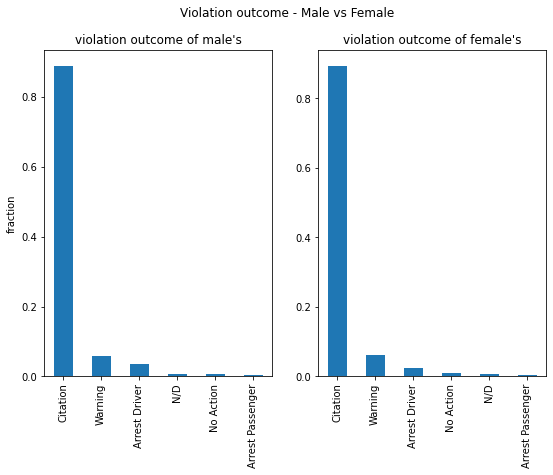

In [34]:
fig, (ax1,ax2) = plt.subplots(ncols=2, figsize=(9, 6))
male.stop_outcome.value_counts(normalize=True).plot(kind='bar', ax=ax1)
ax1.set(title="violation outcome of male's",
       ylabel='fraction')
female.stop_outcome.value_counts(normalize=True).plot(kind='bar', ax=ax2)
ax2.set_title("violation outcome of female's")
fig.suptitle("Violation outcome - Male vs Female")
plt.show()

it seems that gender doesn't have a much say in getting tickets...

#### Which traffic violation resulted in getting arrested ?

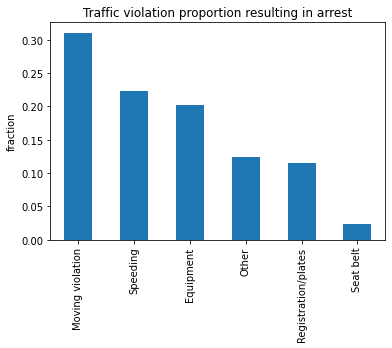

In [35]:
arrested = ri[ri.stop_outcome == "Arrest Driver"]
arrested.violation.value_counts(normalize=True).plot(kind='bar')
plt.ylabel('fraction')
plt.title("Traffic violation proportion resulting in arrest")
plt.show()

In [36]:
data =  arrested.violation.value_counts(normalize=True)
data

Moving violation       0.310786
Speeding               0.223400
Equipment              0.202194
Other                  0.124680
Registration/plates    0.115539
Seat belt              0.023400
Name: violation, dtype: float64

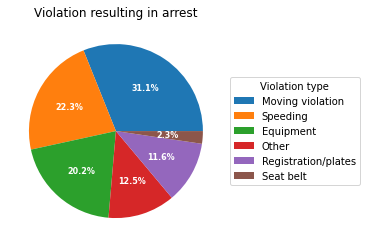

In [37]:
fig, ax = plt.subplots()
#wedges, texts, autotexts = ax.pie(data.values, autopct=lambda x: f"{round(x, 2)}%", textprops=dict(color='w'))
wedges, texts, autotexts = ax.pie(data.values, autopct="%1.1f%%", textprops=dict(color='w'))
ax.legend(wedges, data.index, 
         title='Violation type',
         loc='center left',
         bbox_to_anchor=(1, 0., 0.5, 1))
plt.setp(autotexts, size=8, weight='bold')
ax.set_title("Violation resulting in arrest")
plt.show()

* Moving violation's are the main source to get you arrested.FFFFFFF

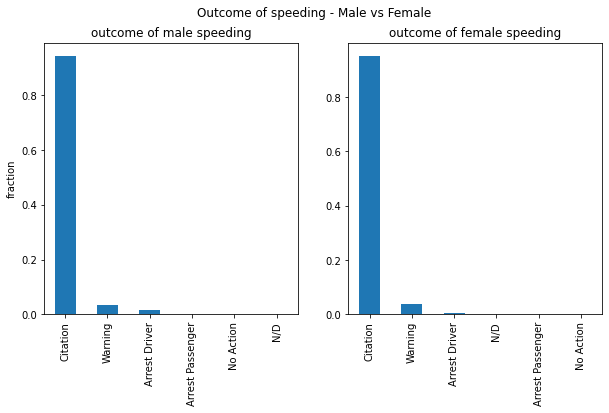

In [38]:
# Speeding was the most committed traffic violation, however roughly 20% of them resulted in arrest.
# What were the other outcome, gender wise?
male_speeding = ri[(ri.driver_gender == 'M') & (ri.violation == 'Speeding')]
female_speeding = ri[(ri.driver_gender == 'F') & (ri.violation == 'Speeding')]

fig, (ax1,ax2) = plt.subplots(ncols=2, figsize=(10, 5))
male_speeding.stop_outcome.value_counts(normalize=True).plot(kind='bar', ax=ax1)
ax1.set(title='outcome of male speeding',
       ylabel='fraction')
female_speeding.stop_outcome.value_counts(normalize=True).plot(kind='bar', ax=ax2)
ax2.set_title('outcome of female speeding')
fig.suptitle("Outcome of speeding - Male vs Female")
plt.show()

about 95% of stops for speeding result in a ticket for both gender...

### Does gender affect whose vehicle is searched?

In [39]:
ri.search_conducted.value_counts(normalize=True)

False    0.961785
True     0.038215
Name: search_conducted, dtype: float64

In [40]:
# numpy technique to achieve same result for true values (true = 1)
np.mean(ri.search_conducted)

0.0382153092354627

In [41]:
ri.groupby('driver_gender')['search_conducted'].mean()

driver_gender
F    0.019181
M    0.045426
Name: search_conducted, dtype: float64

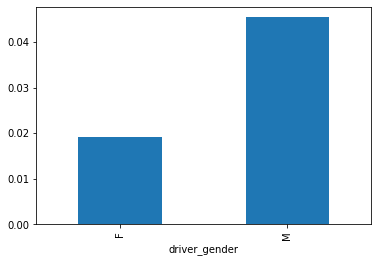

In [42]:
ri.groupby('driver_gender')['search_conducted'].mean().plot(kind='bar')
plt.show()

Males are twice likely than female to get vehicle searched

In [43]:
gender_violation = ri.groupby(['violation', 'driver_gender'])['search_conducted'].mean()
gender_violation

violation            driver_gender
Equipment            F                0.039984
                     M                0.071496
Moving violation     F                0.039257
                     M                0.061524
Other                F                0.041018
                     M                0.046191
Registration/plates  F                0.054924
                     M                0.108802
Seat belt            F                0.017301
                     M                0.035119
Speeding             F                0.008309
                     M                0.027885
Name: search_conducted, dtype: float64

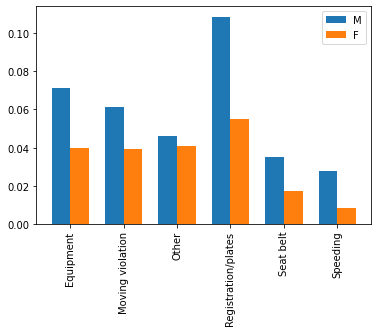

In [44]:
g_v = ri.groupby(['violation', 'driver_gender'], as_index=False).mean()
mgv_sc = g_v[g_v['driver_gender'] == "M"]['search_conducted']
fgv_sc = g_v[g_v['driver_gender'] == "F"]['search_conducted']
names = g_v.violation.unique()

x = np.arange(len(names)) # labels location
width = 0.35 # the width of the bars

fig, ax = plt.subplots()
ax.bar(x - width/2, mgv_sc.values, width, label='M')
ax.bar(x + width/2, fgv_sc.values, width, label='F')
ax.set_xticks(x)
ax.set_xticklabels(names, rotation=90)
ax.legend()
plt.show()

**males are more likely to be searched than females** 🤔

### Which district has the highest arrest rate

In [45]:
dist_arrest = ri.groupby('district')['is_arrested'].mean().sort_values(ascending=False)
dist_arrest

district
Zone X4    0.048038
Zone X3    0.034871
Zone K3    0.032311
Zone K2    0.030801
Zone K1    0.024349
Zone X1    0.023494
Name: is_arrested, dtype: float64

In [46]:
mean_arrest = np.mean(ri.is_arrested)
mean_arrest

0.0355690117407784

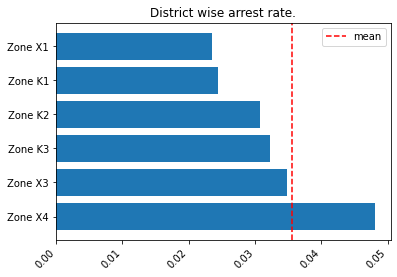

In [47]:
fig, ax = plt.subplots()
ax.barh(dist_arrest.index, dist_arrest.values)
labels = ax.get_xticklabels()
plt.setp(labels, rotation=45, horizontalalignment='right')
ax.axvline(mean_arrest, ls='--', color='r', label='mean')
ax.set(title="District wise arrest rate.")
ax.legend()
plt.show()

**Only ZoneX4 has the higher arrest rate than the average arrest rate**

### Does gender affect who is frisked during a search?

In [48]:
ri.search_type.value_counts()

Incident to Arrest                                          1290
Probable Cause                                               924
Inventory                                                    219
Reasonable Suspicion                                         214
Protective Frisk                                             164
Incident to Arrest,Inventory                                 123
Incident to Arrest,Probable Cause                            100
Probable Cause,Reasonable Suspicion                           54
Incident to Arrest,Inventory,Probable Cause                   35
Probable Cause,Protective Frisk                               35
Incident to Arrest,Protective Frisk                           33
Inventory,Probable Cause                                      25
Protective Frisk,Reasonable Suspicion                         19
Incident to Arrest,Inventory,Protective Frisk                 18
Incident to Arrest,Probable Cause,Protective Frisk            13
Inventory,Protective Fris

Basically there are 5 types:
* Incident to Arrest
* Probable Cause
* Inventory
* Reasonable Suspicion
* Protective Frisk 

Rest are multiple types...

In [49]:
# all incident where inventory was involved
ri['frisk'] = ri.search_type.str.contains("Protective Frisk", na=False)
ri.frisk.sum()

303

In [50]:
# inventory rate
# where search was conducted
searched = ri[ri.search_conducted == True]
searched.frisk.mean()

0.09162382824312065

In [51]:
searched.groupby('driver_gender')['frisk'].mean()

driver_gender
F    0.074561
M    0.094353
Name: frisk, dtype: float64

seems males are frisked more than female

## Time of the day and arrest rate...

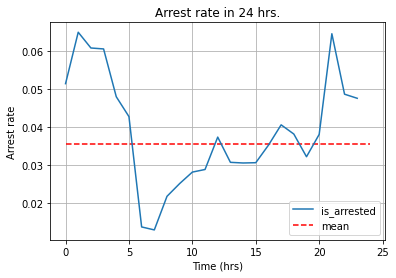

In [52]:
hourly_arrest_rate = ri.groupby(ri.index.hour)['is_arrested'].mean()


hourly_arrest_rate.plot()
plt.xlabel("Time (hrs)")
plt.ylabel("Arrest rate")
plt.title("Arrest rate in 24 hrs.")
plt.hlines(mean_arrest, 0, 24, colors='r', linestyles='--', label='mean')
plt.legend()
plt.grid()
plt.show()

Seems arrest rate crosses mean aroun 8pm till 5am

## Drugs related Stop

In [53]:
ri.drugs_related_stop.mean()

0.009961172228898956

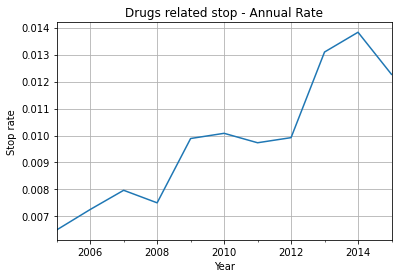

In [54]:
annual_drugs_rate = ri.drugs_related_stop.resample('A').mean()

annual_drugs_rate.plot()
plt.xlabel('Year')
plt.ylabel('Stop rate')
plt.title("Drugs related stop - Annual Rate")
plt.grid()
plt.show()

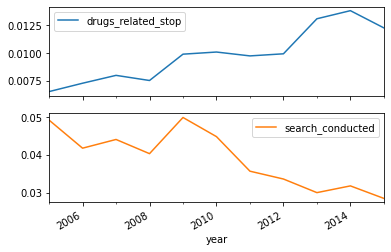

In [55]:
annual_search_rate = ri.search_conducted.resample('A').mean()

annual = pd.concat([annual_drugs_rate, annual_search_rate], axis=1)

annual.plot(subplots=True)
plt.xlabel('year')
plt.show()

## What violations are caught in each district?

In [56]:
race_gender_table = pd.crosstab(ri.driver_race, ri.driver_gender)
race_gender_table

driver_gender      F      M
driver_race                
Asian            551   1838
Black           2681   9604
Hispanic        1953   7774
Other             53    212
White          18536  43334

In [57]:
race_gender_table_t = race_gender_table.T
race_gender_table_t

driver_race    Asian  Black  Hispanic  Other  White
driver_gender                                      
F                551   2681      1953     53  18536
M               1838   9604      7774    212  43334

In [58]:
race_gender_table.loc['Asian':'Hispanic']

driver_gender     F     M
driver_race              
Asian           551  1838
Black          2681  9604
Hispanic       1953  7774

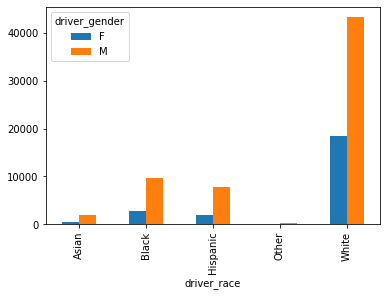

In [59]:
race_gender_table.plot(kind='bar')
plt.show()

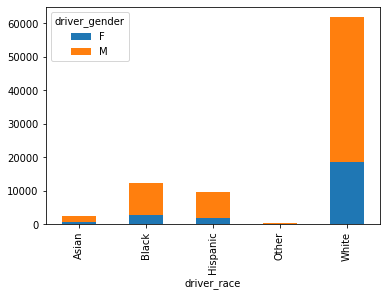

In [60]:
# stacking the bar
race_gender_table.plot(kind='bar', stacked=True)
plt.show()

## How often searches were done after each violation type ?

In [61]:
search_rate = ri.groupby('violation').search_conducted.mean()
search_rate

violation
Equipment              0.064280
Moving violation       0.057014
Other                  0.045362
Registration/plates    0.093438
Seat belt              0.031513
Speeding               0.021560
Name: search_conducted, dtype: float64

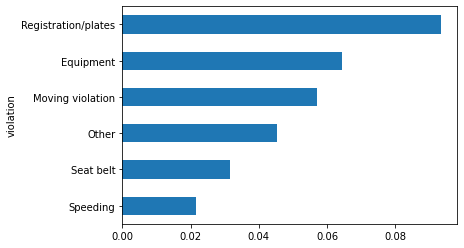

In [62]:
search_rate.sort_values().plot(kind='barh')
plt.show()

In [63]:
ri.stop_duration.unique()

[0-15 Min, 16-30 Min, 30+ Min]
Categories (3, object): [0-15 Min, 16-30 Min, 30+ Min]

In [64]:
ri.to_pickle(data_path + "police.pkl")